In [1]:
# Import libraries and modules needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Pull the csv file in and convert it to a Pandas DataFrame

nba_mvp_history = pd.read_csv("Datasets/mvps_stats_all_seasons_revised.csv")
nba_mvp_history.head()

,Unnamed: 0,Season,Rank,Player,Pos,Age,G,MP,PTS,AST,...,eFG%,FT%,PF,WS,WS/48,First,Pts Won,Pts Max,Share,MVP
0,0,1996-97,1,Karl Malone,PF,33,82,36.6,27.4,4.5,...,0.550,0.755,2.6,16.7,0.268,63,986,1150,0.857,1
1,1,1996-97,2,Michael Jordan,SG,33,82,37.9,29.6,4.3,...,0.516,0.833,1.9,18.3,0.283,52,957,1150,0.832,0
2,2,1996-97,3,Grant Hill,SF,24,80,39.3,21.4,7.3,...,0.500,0.711,2.3,14.6,0.223,0,376,1150,0.327,0
3,3,1996-97,4,Tim Hardaway,PG,30,81,38.7,20.3,8.6,...,0.489,0.799,2.0,12.9,0.198,0,238,1150,0.207,0
4,4,1996-97,5,Glen Rice,SF,29,79,42.6,26.8,2.0,...,0.546,0.867,2.4,10.8,0.154,0,134,1150,0.117,0


In [3]:
# Drop unncessary columns from DataFrame

nba_mvp_history.drop(columns = ['Unnamed: 0', 'Rank', 'Pos'], inplace = True)

In [4]:
# Display DataFrame

nba_mvp_history = nba_mvp_history[nba_mvp_history['Season'] < "2022-23"]
nba_mvp_history

,Season,Player,Age,G,MP,PTS,AST,TRB,STL,BLK,...,eFG%,FT%,PF,WS,WS/48,First,Pts Won,Pts Max,Share,MVP
0,1996-97,Karl Malone,33,82,36.6,27.4,4.5,9.9,1.4,0.6,...,0.550,0.755,2.6,16.7,0.268,63,986,1150,0.857,1
1,1996-97,Michael Jordan,33,82,37.9,29.6,4.3,5.9,1.7,0.5,...,0.516,0.833,1.9,18.3,0.283,52,957,1150,0.832,0
2,1996-97,Grant Hill,24,80,39.3,21.4,7.3,9.0,1.8,0.6,...,0.500,0.711,2.3,14.6,0.223,0,376,1150,0.327,0
3,1996-97,Tim Hardaway,30,81,38.7,20.3,8.6,3.4,1.9,0.1,...,0.489,0.799,2.0,12.9,0.198,0,238,1150,0.207,0
4,1996-97,Glen Rice,29,79,42.6,26.8,2.0,4.0,0.9,0.3,...,0.546,0.867,2.4,10.8,0.154,0,134,1150,0.117,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,2021-22,Stephen Curry,33,64,34.5,25.5,6.3,5.2,1.3,0.4,...,0.554,0.923,2.0,8.0,0.173,0,4,1000,0.004,0
381,2021-22,Chris Paul,36,65,32.9,14.7,10.8,4.4,1.9,0.3,...,0.536,0.837,2.1,9.4,0.210,0,2,1000,0.002,0
382,2021-22,DeMar DeRozan,32,76,36.1,27.9,4.9,5.2,0.9,0.3,...,0.521,0.877,2.3,8.8,0.154,0,1,1000,0.001,0
383,2021-22,Kevin Durant,33,55,37.2,29.9,6.4,7.4,0.9,0.9,...,0.570,0.910,2.1,8.4,0.198,0,1,1000,0.001,0


In [5]:
# Age column was reading as a string, convert it to a numeric

nba_mvp_history['Age'] = pd.to_numeric(nba_mvp_history['Age'], errors='coerce')

In [6]:
# Features and Targets for correlation between Stats vs First Place Points, Total Points Won, Point Share

columns = ['Age', 'G', 'MP', 'PTS', 'AST', 'TRB', 'STL', 'BLK', 'FG%', 'eFG%', 'FT%', 'PF', 'WS', 'WS/48']
target = 'First'
target2 = 'Pts Won'
target3 = 'Share'

# Features and Target for correlation between Stats vs MVP/Non-MVP
target4 = 'MVP'

In [25]:
# Create a fucntion to make heatmaps for correlations. Display heatmaps with top_n features

def correlation_heatmap(col, x, y, top_n, path):
    df = nba_mvp_history[col + [x]]
    df

    corr_matrix = df.corr()
    corr_w_target = corr_matrix[x]
    
    top_features = corr_w_target.abs().sort_values(ascending = False).head(top_n).index

    plt.figure(figsize = (19.47,8))
    sns.heatmap(corr_matrix.loc[top_features, top_features], annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths = .5)
    plt.title(f"Top {top_n} Features vs {y} Correlation")
    plt.savefig(path)
    plt.show()

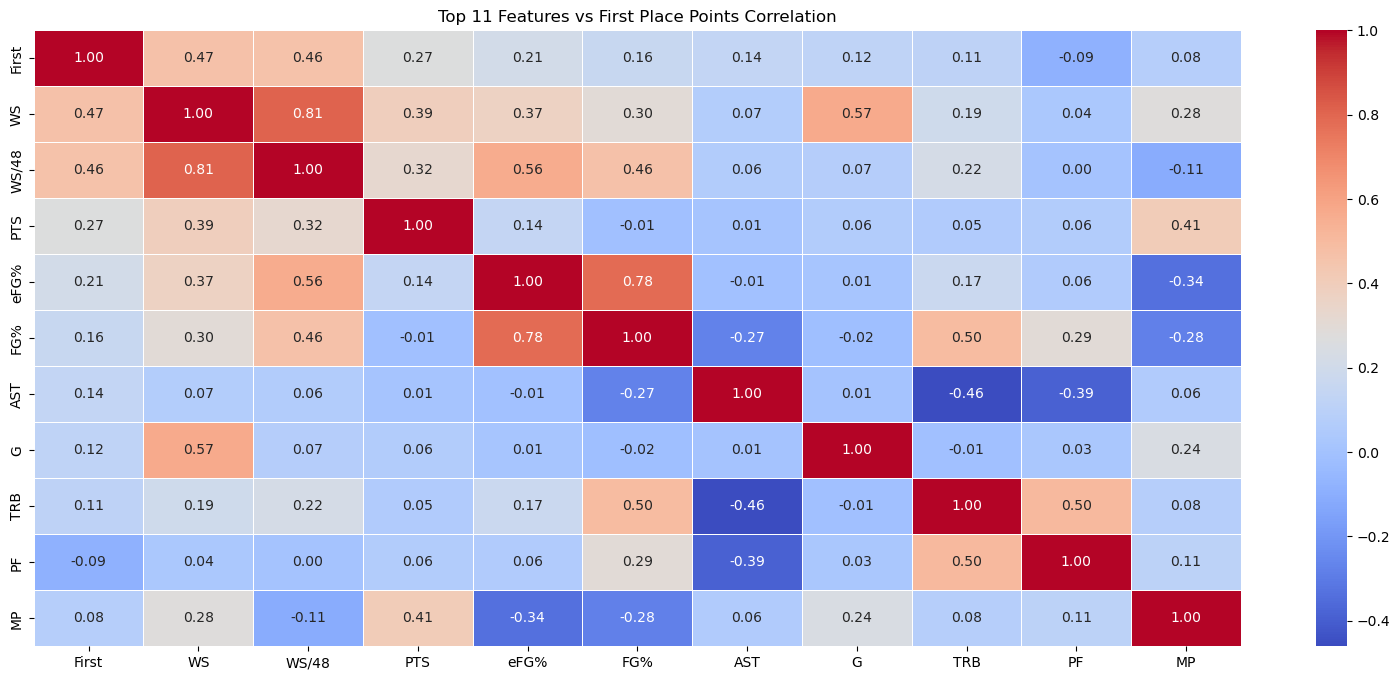

In [26]:
# Stats vs First Place Points Correlation

correlation_heatmap(col = columns, x = target, y = 'First Place Points', top_n = 11, path = "Charts/First Place Points Correlation")

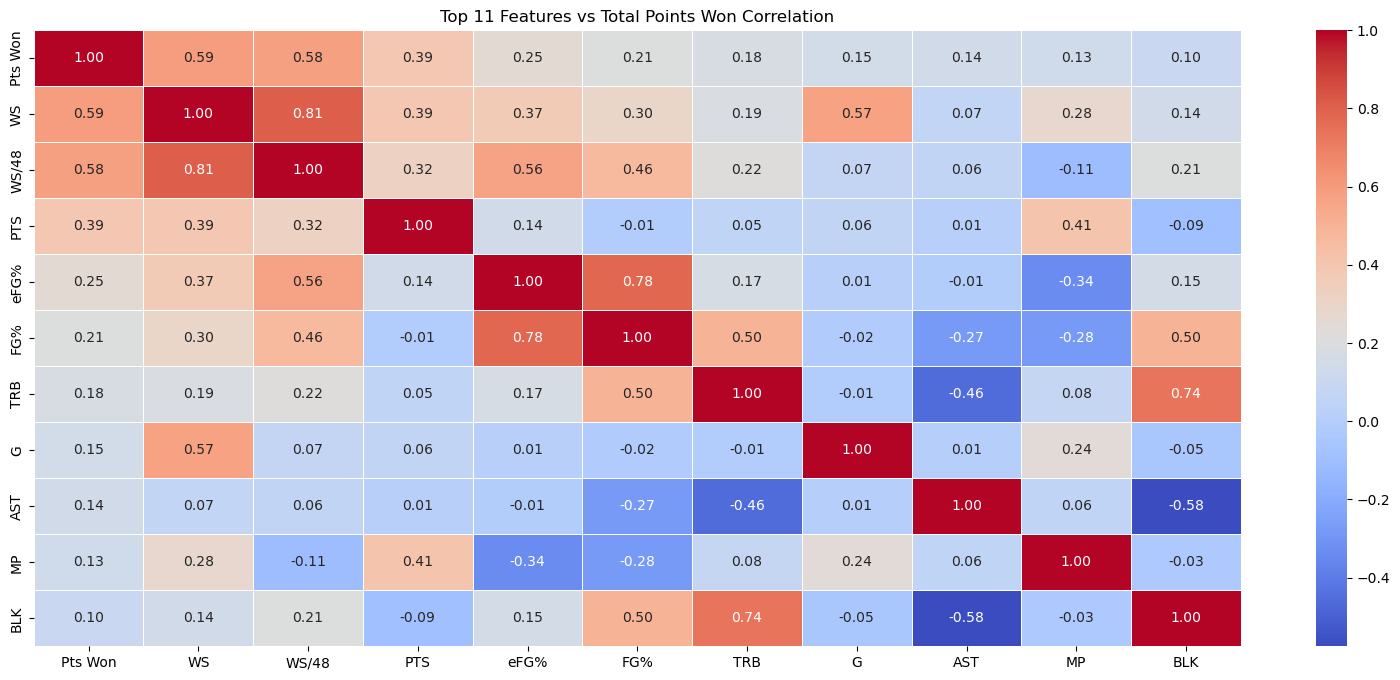

In [27]:
# Stats vs Total Points Won Correlation

correlation_heatmap(col = columns, x = target2, y = 'Total Points Won', top_n = 11, path = "Charts/Total Points Won Correlation")

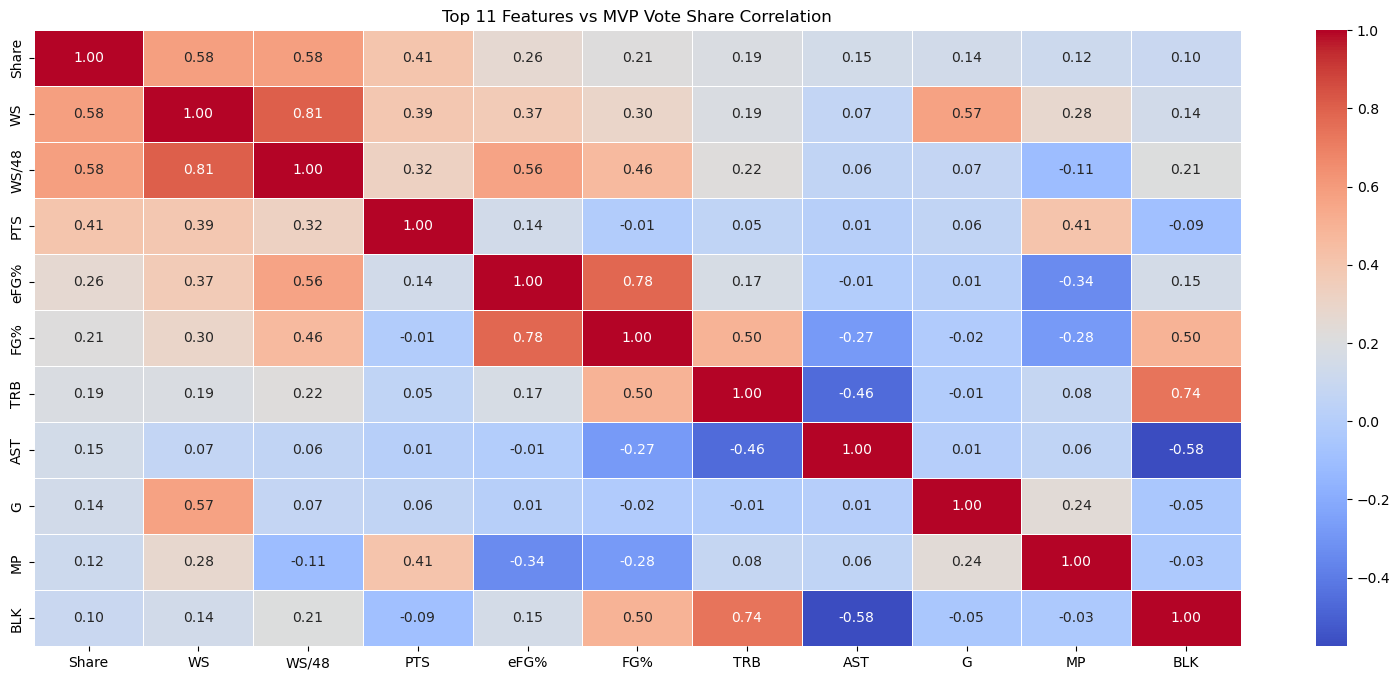

In [28]:
# Stats vs MVP Vote Share Correlation

correlation_heatmap(col = columns, x = target3, y = 'MVP Vote Share', top_n = 11, path = "Charts/MVP Vote Share Correlation")

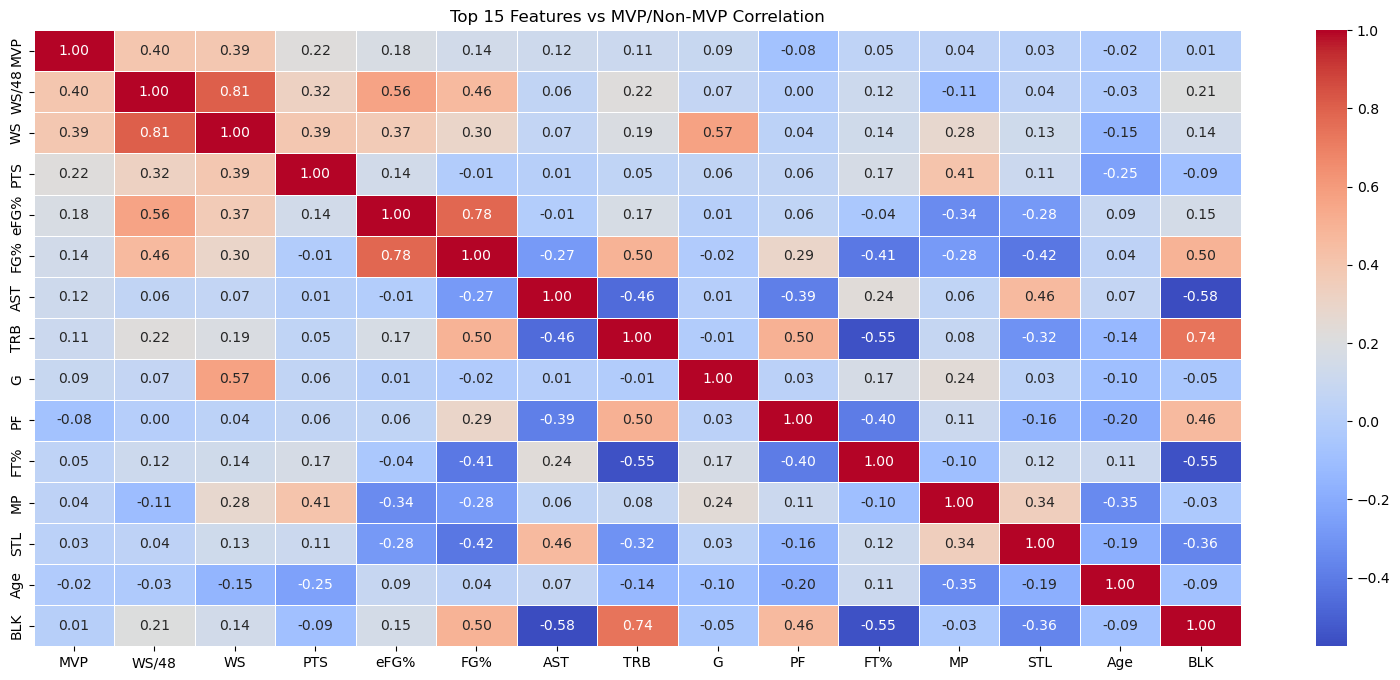

In [29]:
# All Stats vs MVP/Non-MVP Correlation

correlation_heatmap(col = columns, x = target4, y = 'MVP/Non-MVP', top_n = 15, path = "Charts/MVP Correlation")

## Building the Model

In [12]:
# Determine features and target for Stats vs MVP/Non-MVP model testing
features = ['Age', 'G', 'MP', 'PTS', 'AST', 'STL', 'BLK', 'FT%', 'TRB', 'FG%', 'eFG%', 'PF', 'WS', 'WS/48']

X = nba_mvp_history[features]
y = nba_mvp_history['MVP']

# Scale/Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 1)

# Build the model
inputs = X_train.shape[1]
hidden_nodes_l1 = 64
hidden_nodes_l2 = 32
model = Sequential()

# First Hidden Layer
model.add(Dense(units = hidden_nodes_l1, activation = 'relu', input_dim = inputs))

# Second Hidden Layer
model.add(Dense(units = hidden_nodes_l2, activation = 'relu'))

# Output Layer
model.add(Dense(units = 1, activation = 'sigmoid'))

# Check model structure
model.summary()

# Compile model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train model
model.fit(X_train, y_train, epochs = 10, batch_size = 25, validation_data = (X_test, y_test))

# Evaluate the model using the test data
loss, accuracy = model.evaluate(X_test ,y_test)
print(f"Test Loss: {round(loss,2)*100}%, Test Accuracy: {round(accuracy,2)*100}%")

# Save the model to a folder
model.save('Models/model_original')

model_original = pd.DataFrame({'Loss': [round(loss,2)], 'Accuracy': [round(accuracy,2)]})
model_original

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                960       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3073 (12.00 KB)
Trainable params: 3073 (12.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-12-12 21:39:31.782336: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2023-12-12 21:39:31.782368: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-12 21:39:31.782374: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-12 21:39:31.782674: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-12 21:39:31.783066: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2023-12-12 21:39:32.270600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 1s 58ms/step - loss: 0.7180 - accuracy: 0.5486 - val_loss: 0.6800 - val_accuracy: 0.6082
Epoch 2/10
12/12 [==============================] - 0s 13ms/step - loss: 0.5985 - accuracy: 0.7049 - val_loss: 0.6121 - val_accuracy: 0.7216
Epoch 3/10
12/12 [==============================] - 0s 12ms/step - loss: 0.5356 - accuracy: 0.7569 - val_loss: 0.5597 - val_accuracy: 0.8041
Epoch 4/10
12/12 [==============================] - 0s 12ms/step - loss: 0.4880 - accuracy: 0.7951 - val_loss: 0.5120 - val_accuracy: 0.8144
Epoch 5/10
12/12 [==============================] - 0s 12ms/step - loss: 0.4411 - accuracy: 0.8299 - val_loss: 0.4541 - val_accuracy: 0.8351
Epoch 6/10
12/12 [==============================] - 0s 11ms/step - loss: 0.3999 - accuracy: 0.8576 - val_loss: 0.4140 - val_accuracy: 0.8454
Epoch 7/10
12/12 [==============================] - 0s 15ms/step - loss: 0.3653 - accuracy: 0.8854 - val_loss: 0.3735 - val_accuracy: 0.8866
Epoch 8/10
12/12 [======

INFO:tensorflow:Assets written to: Models/model_original/assets


,Loss,Accuracy
0,0.29,0.96


# Optimizing model using # of different layers and # of different of neurons

In [13]:
# First Attempt (Using new number of neurons and more epochs)

X1 = nba_mvp_history[features]
y1 = nba_mvp_history['MVP']

# Scale/Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)


# Split data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y1, random_state = 1)

# Build the model
inputs = X_train.shape[1]
hidden_nodes_l1 = 80
hidden_nodes_l2 = 60
model1 = Sequential()

# First Hidden Layer
model1.add(Dense(units = hidden_nodes_l1, activation = 'relu', input_dim = inputs))

# Second Hidden Layer
model1.add(Dense(units = hidden_nodes_l2, activation = 'relu'))

# Output Layer
model1.add(Dense(units = 1, activation = 'sigmoid'))

# Check model structure
model1.summary()

# Compile model
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train model
model1.fit(X_train, y_train, epochs = 15, batch_size = 32, validation_data = (X_test, y_test))

# Evaluate the model using the test data
loss, accuracy = model1.evaluate(X_test ,y_test)
print(f"Test Loss: {round(loss,2)*100}%, Test Accuracy: {round(accuracy,2)*100}%")

# Save the model to a folder
model.save('Models/1st_optimization')

Optimizing_1 = pd.DataFrame({'Loss': [round(loss,2)], 'Accuracy': [round(accuracy,2)]})
Optimizing_1

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                1200      
                                                                 
 dense_4 (Dense)             (None, 60)                4860      
                                                                 
 dense_5 (Dense)             (None, 1)                 61        
                                                                 
Total params: 6121 (23.91 KB)
Trainable params: 6121 (23.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
9/9 [==============================] - 1s 32ms/step - loss: 0.6733 - accuracy: 0.6215 - val_loss: 0.6635 - val_accuracy: 0.6804
Epoch 2/15
9/9 [==============================] - 0s 12ms/step - loss: 0.5768 - accuracy: 0.7326 - val_loss: 0.5923 - val_accuracy: 0.7423
Epoch 

INFO:tensorflow:Assets written to: Models/1st_optimization/assets


,Loss,Accuracy
0,0.17,0.95


In [14]:
# Second Attempt (Using additional hidden layer)

X2 = nba_mvp_history[features]
y2 = nba_mvp_history['MVP']

# Scale/Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X2)


# Split data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y2, random_state = 1)

# Build the model
inputs = X_train.shape[1]
hidden_nodes_l1 = 80
hidden_nodes_l2 = 60
hidden_nodes_l3 = 40
model2 = Sequential()

# First Hidden Layer
model2.add(Dense(units = hidden_nodes_l1, activation = 'relu', input_dim = inputs))

# Second Hidden Layer
model2.add(Dense(units = hidden_nodes_l2, activation = 'relu'))

# Third Hidden Layer
model2.add(Dense(units = hidden_nodes_l3, activation = 'relu'))

# Output Layer
model2.add(Dense(units = 1, activation = 'sigmoid'))

# Check model structure
model2.summary()

# Compile model
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train model
model2.fit(X_train, y_train, epochs = 15, batch_size = 32, validation_data = (X_test, y_test))

# Evaluate the model using the test data
loss, accuracy = model2.evaluate(X_test ,y_test)
print(f"Test Loss: {round(loss,2)*100}%, Test Accuracy: {round(accuracy,2)*100}%")

# Save the model to a folder
model.save('Models/2nd_optimization')

Optimizing_2 = pd.DataFrame({'Loss': [round(loss,2)], 'Accuracy': [round(accuracy,2)]})
Optimizing_2

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 80)                1200      
                                                                 
 dense_7 (Dense)             (None, 60)                4860      
                                                                 
 dense_8 (Dense)             (None, 40)                2440      
                                                                 
 dense_9 (Dense)             (None, 1)                 41        
                                                                 
Total params: 8541 (33.36 KB)
Trainable params: 8541 (33.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
9/9 [==============================] - 1s 32ms/step - loss: 0.6798 - accuracy: 0.6076 - val_loss: 0.7156 - val_accuracy: 0.6082
Epoch 2/15
9/

INFO:tensorflow:Assets written to: Models/2nd_optimization/assets


,Loss,Accuracy
0,0.15,0.96


In [15]:
# Third Attempt (Using different number of neurons, epochs and learning rate)
from keras.optimizers import Adam

X3 = nba_mvp_history[features]
y3 = nba_mvp_history['MVP']

# Scale/Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X3)


# Split data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y3, random_state = 1)

# Build the model
inputs = X_train.shape[1]
hidden_nodes_l1 = 128
hidden_nodes_l2 = 64
hidden_nodes_l3 = 32
model3 = Sequential()

# First Hidden Layer
model3.add(Dense(units = hidden_nodes_l1, activation = 'relu', input_dim = inputs))

# Second Hidden Layer
model3.add(Dense(units = hidden_nodes_l2, activation = 'relu'))

# Third Hidden Layer
model3.add(Dense(units = hidden_nodes_l3, activation = 'relu'))

# Output Layer
model3.add(Dense(units = 1, activation = 'sigmoid'))

# Check model structure
model3.summary()

# Compile model
optimizer = Adam(learning_rate=0.001)
model3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train model
model3.fit(X_train, y_train, epochs = 15, batch_size = 32, validation_data = (X_test, y_test))

# Evaluate the model using the test data
loss, accuracy = model3.evaluate(X_test ,y_test)
print(f"Test Loss: {round(loss,2)*100}%, Test Accuracy: {round(accuracy,2)*100}%")

# Save the model to a folder
model.save('Models/3rd_optimization')

Optimizing_3 = pd.DataFrame({'Loss': [round(loss,2)], 'Accuracy': [round(accuracy,2)]})
Optimizing_3

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               1920      
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12289 (48.00 KB)
Trainable params: 12289 (48.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/15
9/9 [==============================] - 1s 34ms/step - loss: 0.6771 - accuracy: 0.5799 - val_loss: 0.6081 - val_accuracy: 0.6804
Epoch 2/15
9/9 [==============================] - 0s 11ms/step - loss: 0.5465 - accuracy: 0.7500 - val_loss: 0.5067 - val_accuracy: 0.7938
Epoch 3/15
9/9 [==============================] - 0s 11ms/step - loss: 0.4632 - accuracy: 0.8542 - val_loss: 0.4316 - val_accuracy: 0.8763
Epoch 4/15
9/9 [==============================] - 0s 11ms/step - loss: 0.3979 - accuracy: 0.9062 - val_loss: 0.3827 - val_accuracy: 0.8969
Epoch 5/15
9/9 [==============================] - 0s 11ms/step - loss: 0.3546 - accuracy: 0.9132 - val_loss: 0.3473 - val_accuracy: 0.8866
Epoch 6/15
9/9 [==============================] - 0s 11ms/step - loss: 0.3111 - accuracy: 0.9375 - val_loss: 0.2942 - val_accuracy: 0.9381
Epoch 7/15
9/9 [==============================] - 0s 11ms/step - loss: 0.2708 - accuracy: 0.9549 - val_loss: 0.2644 - val_accuracy: 0.9485
Epoch 8/15
9/9 [===========

INFO:tensorflow:Assets written to: Models/3rd_optimization/assets


,Loss,Accuracy
0,0.14,0.97


In [16]:
# Final attempt, using original model, changing learning rate and # of epochs and batch size

X4 = nba_mvp_history[features]
y4 = nba_mvp_history['MVP']

# Scale/Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X4)


# Split data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y4, random_state = 1)

# Build the model
inputs = X_train.shape[1]
hidden_nodes_l1 = 64
hidden_nodes_l2 = 32
model = Sequential()

# First Hidden Layer
model.add(Dense(units = hidden_nodes_l1, activation = 'relu', input_dim = inputs))

# Second Hidden Layer
model.add(Dense(units = hidden_nodes_l2, activation = 'relu'))

# Output Layer
model.add(Dense(units = 1, activation = 'sigmoid'))

# Check model structure
model.summary()

# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train model
model.fit(X_train, y_train, epochs = 15, batch_size = 10, validation_data = (X_test, y_test))

# Evaluate the model using the test data
loss, accuracy = model.evaluate(X_test ,y_test)
print(f"Test Loss: {round(loss,2)*100}%, Test Accuracy: {round(accuracy,2)*100}%")

# Save the model to a folder
model.save('Models/final_optimization')

optimizing_final = pd.DataFrame({'Loss': [round(loss,2)], 'Accuracy': [round(accuracy,2)]})
optimizing_final

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                960       
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3073 (12.00 KB)
Trainable params: 3073 (12.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/15


2023-12-12 21:39:43.196196: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


29/29 [==============================] - 2s 34ms/step - loss: 0.6121 - accuracy: 0.7083 - val_loss: 0.5571 - val_accuracy: 0.7423
Epoch 2/15
29/29 [==============================] - 0s 11ms/step - loss: 0.4306 - accuracy: 0.8715 - val_loss: 0.4225 - val_accuracy: 0.8969
Epoch 3/15
29/29 [==============================] - 0s 10ms/step - loss: 0.3336 - accuracy: 0.9167 - val_loss: 0.3261 - val_accuracy: 0.9485
Epoch 4/15
29/29 [==============================] - 0s 11ms/step - loss: 0.2699 - accuracy: 0.9306 - val_loss: 0.2672 - val_accuracy: 0.9381
Epoch 5/15
29/29 [==============================] - 0s 10ms/step - loss: 0.2333 - accuracy: 0.9410 - val_loss: 0.2241 - val_accuracy: 0.9381
Epoch 6/15
29/29 [==============================] - 0s 10ms/step - loss: 0.2132 - accuracy: 0.9340 - val_loss: 0.1992 - val_accuracy: 0.9381
Epoch 7/15
29/29 [==============================] - 0s 10ms/step - loss: 0.1886 - accuracy: 0.9444 - val_loss: 0.1922 - val_accuracy: 0.9278
Epoch 8/15
29/29 [======

INFO:tensorflow:Assets written to: Models/final_optimization/assets


,Loss,Accuracy
0,0.13,0.96


In [17]:
# Put all the model optimizations into one dataframe to view results

analysis = pd.concat([model_original, Optimizing_1, Optimizing_2, Optimizing_3, optimizing_final], ignore_index = True)
analysis = analysis.rename(index = {
    0: 'Original Model',
    1: '1st Model Optimization',
    2: '2nd Model Optimization',
    3: '3rd Model Optimization',
    4: 'Final Optimization'
})

analysis

,Loss,Accuracy
Original Model,0.29,0.96
1st Model Optimization,0.17,0.95
2nd Model Optimization,0.15,0.96
3rd Model Optimization,0.14,0.97
Final Optimization,0.13,0.96


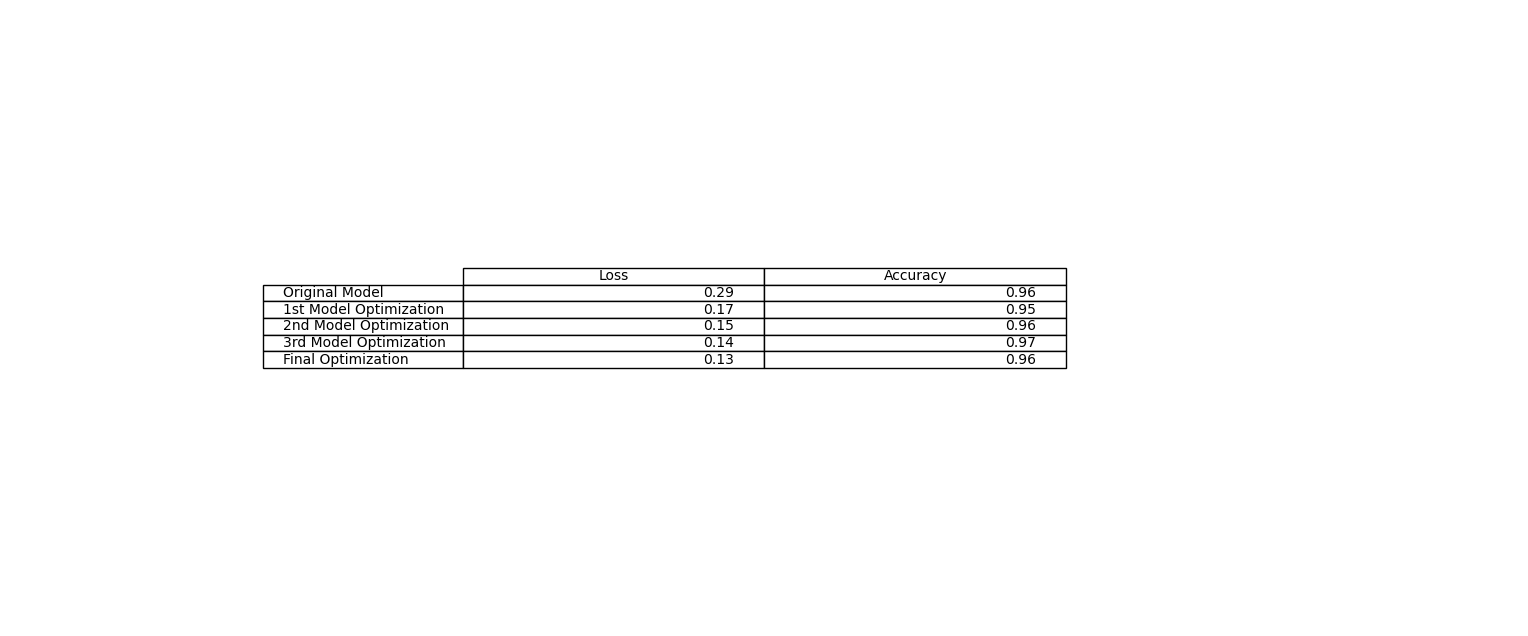

In [19]:
from pandas.plotting import table

# Create a figure and aixs
fig, ax = plt.subplots(figsize = (19.47,8))

# Hide the axes
ax.set_frame_on(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

# Plot the table
tab = table(ax, analysis, loc = 'center', colWidths = [0.2]*len(analysis.columns))

# Set the font size
tab.auto_set_font_size(False)
tab.set_fontsize(10)

# Save the figure as an image (e.g., PNG)
plt.savefig('Charts/Analysis_results.png', bbox_inches='tight', pad_inches=0.05)
plt.show()

## Test on new data

In [30]:
# Reload MVP race history
nba_mvp_history = nba_mvp_history[nba_mvp_history['Season'] < "2022-23"]
nba_mvp_history

,Season,Player,Age,G,MP,PTS,AST,TRB,STL,BLK,...,eFG%,FT%,PF,WS,WS/48,First,Pts Won,Pts Max,Share,MVP
0,1996-97,Karl Malone,33,82,36.6,27.4,4.5,9.9,1.4,0.6,...,0.550,0.755,2.6,16.7,0.268,63,986,1150,0.857,1
1,1996-97,Michael Jordan,33,82,37.9,29.6,4.3,5.9,1.7,0.5,...,0.516,0.833,1.9,18.3,0.283,52,957,1150,0.832,0
2,1996-97,Grant Hill,24,80,39.3,21.4,7.3,9.0,1.8,0.6,...,0.500,0.711,2.3,14.6,0.223,0,376,1150,0.327,0
3,1996-97,Tim Hardaway,30,81,38.7,20.3,8.6,3.4,1.9,0.1,...,0.489,0.799,2.0,12.9,0.198,0,238,1150,0.207,0
4,1996-97,Glen Rice,29,79,42.6,26.8,2.0,4.0,0.9,0.3,...,0.546,0.867,2.4,10.8,0.154,0,134,1150,0.117,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,2021-22,Stephen Curry,33,64,34.5,25.5,6.3,5.2,1.3,0.4,...,0.554,0.923,2.0,8.0,0.173,0,4,1000,0.004,0
381,2021-22,Chris Paul,36,65,32.9,14.7,10.8,4.4,1.9,0.3,...,0.536,0.837,2.1,9.4,0.210,0,2,1000,0.002,0
382,2021-22,DeMar DeRozan,32,76,36.1,27.9,4.9,5.2,0.9,0.3,...,0.521,0.877,2.3,8.8,0.154,0,1,1000,0.001,0
383,2021-22,Kevin Durant,33,55,37.2,29.9,6.4,7.4,0.9,0.9,...,0.570,0.910,2.1,8.4,0.198,0,1,1000,0.001,0


In [31]:
# List of columns I want to find average for
col_to_avg = ['G', 'MP', 'PTS', 'AST', 'STL', 'FT%', 'TRB', 'FG%', 'eFG%', 'PF', 'WS', 'WS/48']

# Calculate averages of all columns (Will use these averages to filter out players who will not be MVP candidates)
col_avgs = nba_mvp_history[col_to_avg].mean()
col_avgs

G        72.231169
MP       36.248312
PTS      22.602338
AST       5.246234
STL       1.344935
FT%       0.786384
TRB       7.343117
FG%       0.482592
eFG%      0.516699
PF        2.433766
WS       10.703896
WS/48     0.195673
dtype: float64

In [32]:
# Load the csv file containing data to test on
nba_stats_all = pd.read_csv("Datasets/all_nba_seasons_revised.csv")

In [33]:
# Filter dataframe to year we want to test data
data = nba_stats_all[nba_stats_all['Season'] == '2022-23']
data.drop(columns = ['Unnamed: 0', 'Pos'], inplace = True)
data

/var/folders/jq/v09bhc5d2111vbxp7qgxxq4m0000gn/T/ipykernel_68807/777328018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns = ['Unnamed: 0', 'Pos'], inplace = True)


,Season,Player,Age,G,MP,PTS,AST,TRB,STL,BLK,FG%,eFG%,FT%,PF,WS,WS/48,MVP
7786,2022-23,Precious Achiuwa,23,55,20.7,9.2,0.9,6.0,0.6,0.5,0.485,0.521,0.702,1.9,2.2,0.093,NaN
7787,2022-23,Steven Adams,29,42,27.0,8.6,2.3,11.5,0.9,1.1,0.597,0.597,0.364,2.3,3.4,0.144,NaN
7788,2022-23,Bam Adebayo,25,75,34.6,20.4,3.2,9.2,1.2,0.8,0.540,0.541,0.806,2.8,7.4,0.137,NaN
7789,2022-23,Ochai Agbaji,22,59,20.5,7.9,1.1,2.1,0.3,0.3,0.427,0.532,0.812,1.7,1.3,0.053,NaN
7790,2022-23,Santi Aldama,22,77,21.8,9.0,1.3,4.8,0.6,0.6,0.470,0.560,0.750,1.9,4.6,0.130,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8143,2022-23,Delon Wright,30,50,24.4,7.4,3.9,3.6,1.8,0.3,0.474,0.545,0.867,1.2,3.7,0.146,NaN
8144,2022-23,Gabe York,29,3,18.7,8.0,1.7,2.0,0.7,0.0,0.381,0.524,1.000,1.7,0.1,0.091,NaN
8145,2022-23,Trae Young,24,73,34.8,26.2,10.2,3.0,1.1,0.1,0.429,0.485,0.886,1.4,6.7,0.126,NaN
8146,2022-23,Cody Zeller,30,15,14.5,6.5,0.7,4.3,0.2,0.3,0.627,0.627,0.686,2.2,0.7,0.147,NaN


In [34]:
# Filter to data to only include players who match the averages of players previously in MVP race
new_data = data[data['PTS'] >= 23]
new_data = new_data[new_data['WS'] >= 7]
new_data = new_data.sort_values(by = 'WS', ascending = False)
new_data = new_data.head(15)
new_data

,Season,Player,Age,G,MP,PTS,AST,TRB,STL,BLK,FG%,eFG%,FT%,PF,WS,WS/48,MVP
7955,2022-23,Nikola Jokic,27,69,33.7,24.5,9.8,11.8,1.3,0.7,0.632,0.660,0.822,2.5,14.9,0.308,NaN
7883,2022-23,Joel Embiid,28,66,34.6,33.1,4.2,10.2,1.0,1.7,0.548,0.573,0.857,3.1,12.3,0.259,NaN
7897,2022-23,Shai Gilgeous-Alexander,24,68,35.5,31.4,5.5,4.8,1.6,1.0,0.510,0.531,0.905,2.8,11.4,0.226,NaN
8097,2022-23,Jayson Tatum,24,74,36.9,30.1,4.6,8.8,1.1,0.7,0.466,0.543,0.854,2.2,10.5,0.185,NaN
7872,2022-23,Luka Doncic,23,66,36.2,32.4,8.0,8.6,1.4,0.5,0.496,0.560,0.742,2.5,10.2,0.204,NaN
7864,2022-23,Anthony Davis,29,56,34.0,25.9,2.6,12.5,1.1,2.0,0.563,0.573,0.784,2.6,9.0,0.226,NaN
7979,2022-23,Damian Lillard,32,58,36.3,32.2,7.3,4.8,0.9,0.3,0.463,0.564,0.914,1.9,9.0,0.205,NaN
8011,2022-23,Donovan Mitchell,26,68,35.8,28.3,4.4,4.3,1.5,0.4,0.484,0.572,0.867,2.5,8.9,0.176,NaN
7836,2022-23,Jalen Brunson,26,68,35.0,24.0,6.2,3.5,0.9,0.2,0.491,0.547,0.829,2.2,8.7,0.175,NaN
7796,2022-23,Giannis Antetokounmpo,28,63,32.1,31.1,5.7,11.8,0.8,0.8,0.553,0.572,0.645,3.1,8.6,0.204,NaN


In [36]:
# Load model to be used and test using 2022-23 NBA Data 
from keras.models import load_model

model = load_model('Models/final_optimization')

X_scaled_new_data = scaler.transform(new_data[features])

predictions = model.predict(X_scaled_new_data)

mvp_non_mvp = (predictions > 0.6).astype(int)

new_data['MVP'] = mvp_non_mvp
new_data

1/1 [==============================] - 0s 32ms/step


,Season,Player,Age,G,MP,PTS,AST,TRB,STL,BLK,FG%,eFG%,FT%,PF,WS,WS/48,MVP
7955,2022-23,Nikola Jokic,27,69,33.7,24.5,9.8,11.8,1.3,0.7,0.632,0.660,0.822,2.5,14.9,0.308,1
7883,2022-23,Joel Embiid,28,66,34.6,33.1,4.2,10.2,1.0,1.7,0.548,0.573,0.857,3.1,12.3,0.259,0
7897,2022-23,Shai Gilgeous-Alexander,24,68,35.5,31.4,5.5,4.8,1.6,1.0,0.510,0.531,0.905,2.8,11.4,0.226,0
8097,2022-23,Jayson Tatum,24,74,36.9,30.1,4.6,8.8,1.1,0.7,0.466,0.543,0.854,2.2,10.5,0.185,0
7872,2022-23,Luka Doncic,23,66,36.2,32.4,8.0,8.6,1.4,0.5,0.496,0.560,0.742,2.5,10.2,0.204,0
7864,2022-23,Anthony Davis,29,56,34.0,25.9,2.6,12.5,1.1,2.0,0.563,0.573,0.784,2.6,9.0,0.226,0
7979,2022-23,Damian Lillard,32,58,36.3,32.2,7.3,4.8,0.9,0.3,0.463,0.564,0.914,1.9,9.0,0.205,0
8011,2022-23,Donovan Mitchell,26,68,35.8,28.3,4.4,4.3,1.5,0.4,0.484,0.572,0.867,2.5,8.9,0.176,0
7836,2022-23,Jalen Brunson,26,68,35.0,24.0,6.2,3.5,0.9,0.2,0.491,0.547,0.829,2.2,8.7,0.175,0
7796,2022-23,Giannis Antetokounmpo,28,63,32.1,31.1,5.7,11.8,0.8,0.8,0.553,0.572,0.645,3.1,8.6,0.204,0


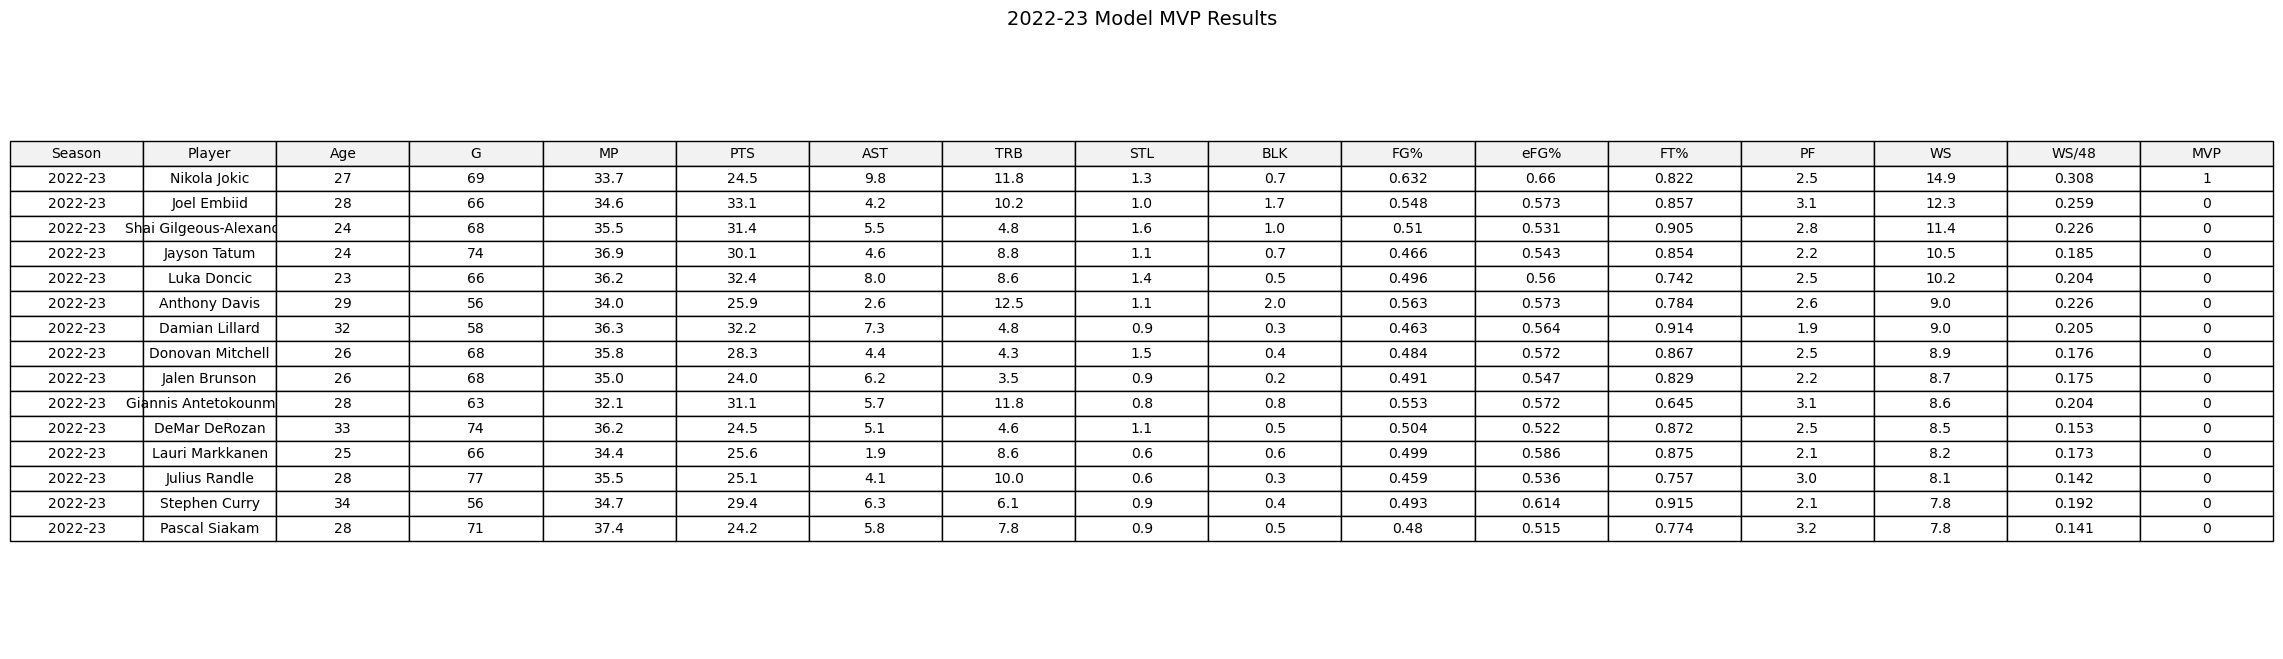

In [46]:
# Create a figure and hide axis
fig, ax = plt.subplots(figsize = (19.47,8))
ax.axis('off')

# Define the title you want to add to the table
table_title = "2022-23 Model MVP Results"

# Create a table from the DataFrame and add it to the axis
table = ax.table(cellText=new_data.values, colLabels=new_data.columns, loc='center', cellLoc='center', colColours=['#f2f2f2']*len(new_data.columns))

# Add a title above the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)
plt.title(table_title, fontsize=14)

# Save the figure as an image (e.g., PNG)
plt.savefig('Test_Results/22-23_Model_Results.png', bbox_inches='tight', pad_inches=0.05)
plt.show()

## Test for Current NBA Season (2023-24)

In [39]:
# Call new data to test model on for current NBA season
nba_23_24 = nba_stats_all[nba_stats_all['Season'] == '2023-24']
nba_23_24.drop(columns = 'Unnamed: 0', inplace = True)
nba_23_24

/var/folders/jq/v09bhc5d2111vbxp7qgxxq4m0000gn/T/ipykernel_68807/478223974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_23_24.drop(columns = 'Unnamed: 0', inplace = True)


,Season,Player,Pos,Age,G,MP,PTS,AST,TRB,STL,BLK,FG%,eFG%,FT%,PF,WS,WS/48,MVP
8148,2023-24,Precious Achiuwa,C,24,14,18.1,7.3,2.0,6.1,0.6,0.4,0.432,0.463,0.560,1.8,0.3,0.062,NaN
8149,2023-24,Bam Adebayo,C,26,16,33.6,22.3,3.9,9.9,1.2,1.0,0.522,0.524,0.813,2.4,1.7,0.156,NaN
8150,2023-24,Ochai Agbaji,SG,23,20,20.1,5.8,1.1,2.7,0.6,0.6,0.458,0.578,0.667,1.5,0.5,0.057,NaN
8151,2023-24,Santi Aldama,PF,23,13,27.2,13.9,1.9,6.3,0.8,0.7,0.453,0.525,0.609,1.8,0.5,0.073,NaN
8152,2023-24,Nickeil Alexander-Walker,SG,25,19,23.5,6.7,2.7,2.2,0.9,0.7,0.410,0.521,0.455,1.9,0.8,0.086,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8444,2023-24,Zion Williamson,PF,23,18,31.2,22.7,4.9,5.8,1.2,0.3,0.569,0.572,0.664,2.6,1.7,0.147,NaN
8445,2023-24,James Wiseman,C,22,10,11.1,5.4,0.3,3.2,0.1,0.3,0.649,0.649,0.545,1.8,0.2,0.065,NaN
8446,2023-24,Christian Wood,PF,28,21,20.2,7.0,0.8,5.9,0.2,0.6,0.443,0.504,0.689,1.8,0.3,0.038,NaN
8447,2023-24,Trae Young,PG,25,18,36.0,27.1,10.7,2.9,1.6,0.0,0.409,0.486,0.864,1.5,2.0,0.147,NaN


In [40]:
# Filter data to only include players who would be MVP candidates
nba_23_24_filtered = nba_23_24[nba_23_24['PTS'] >= 23]
nba_23_24_filtered = nba_23_24_filtered.sort_values(by = 'WS', ascending = False)
nba_top_15 = nba_23_24_filtered.head(15)
nba_top_15

,Season,Player,Pos,Age,G,MP,PTS,AST,TRB,STL,BLK,FG%,eFG%,FT%,PF,WS,WS/48,MVP
8289,2023-24,Nikola Jokic,C,28,20,34.1,29.0,9.8,12.8,1.2,0.8,0.568,0.599,0.781,2.6,4.6,0.323,NaN
8241,2023-24,Shai Gilgeous-Alexander,PG,25,18,34.6,29.9,6.3,5.7,2.4,0.9,0.538,0.570,0.939,2.4,3.8,0.295,NaN
8253,2023-24,Tyrese Haliburton,PG,23,17,34.3,26.9,11.9,4.0,1.1,0.6,0.521,0.634,0.881,1.1,3.4,0.280,NaN
8227,2023-24,Joel Embiid,C,29,16,34.5,32.0,6.6,11.3,1.0,1.9,0.498,0.524,0.878,3.0,3.2,0.280,NaN
8319,2023-24,Tyrese Maxey,PG,23,18,38.4,27.0,6.7,4.6,0.8,0.7,0.464,0.545,0.899,1.9,2.9,0.199,NaN
8190,2023-24,Jalen Brunson,PG,27,19,35.5,24.9,5.5,3.7,1.0,0.1,0.467,0.554,0.830,2.2,2.8,0.196,NaN
8157,2023-24,Giannis Antetokounmpo,PF,29,19,34.3,29.9,4.9,10.8,1.4,1.4,0.607,0.618,0.654,3.1,2.7,0.197,NaN
8223,2023-24,Kevin Durant,PF,35,18,36.6,31.0,5.8,6.4,0.8,1.2,0.512,0.566,0.896,1.8,2.6,0.191,NaN
8219,2023-24,Luka Doncic,PG,24,18,35.8,31.4,8.4,8.4,1.3,0.5,0.490,0.577,0.761,1.8,2.6,0.194,NaN
8406,2023-24,Jayson Tatum,PF,25,20,36.6,27.6,4.2,8.9,1.1,0.4,0.499,0.577,0.792,2.2,2.6,0.170,NaN


In [41]:
# Load model to be used and test it using 2023-24 NBA Data
from keras.models import load_model

model = load_model('Models/final_optimization')

X_scaled_new_data = scaler.transform(nba_top_15[features])

predictions = model.predict(X_scaled_new_data)

mvp_nmvp = (predictions > 0.6).astype(int)

nba_top_15['MVP'] = mvp_nmvp
nba_top_15

1/1 [==============================] - 0s 31ms/step


/var/folders/jq/v09bhc5d2111vbxp7qgxxq4m0000gn/T/ipykernel_68807/2056223049.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_top_15['MVP'] = mvp_nmvp


,Season,Player,Pos,Age,G,MP,PTS,AST,TRB,STL,BLK,FG%,eFG%,FT%,PF,WS,WS/48,MVP
8289,2023-24,Nikola Jokic,C,28,20,34.1,29.0,9.8,12.8,1.2,0.8,0.568,0.599,0.781,2.6,4.6,0.323,1
8241,2023-24,Shai Gilgeous-Alexander,PG,25,18,34.6,29.9,6.3,5.7,2.4,0.9,0.538,0.570,0.939,2.4,3.8,0.295,0
8253,2023-24,Tyrese Haliburton,PG,23,17,34.3,26.9,11.9,4.0,1.1,0.6,0.521,0.634,0.881,1.1,3.4,0.280,0
8227,2023-24,Joel Embiid,C,29,16,34.5,32.0,6.6,11.3,1.0,1.9,0.498,0.524,0.878,3.0,3.2,0.280,0
8319,2023-24,Tyrese Maxey,PG,23,18,38.4,27.0,6.7,4.6,0.8,0.7,0.464,0.545,0.899,1.9,2.9,0.199,0
8190,2023-24,Jalen Brunson,PG,27,19,35.5,24.9,5.5,3.7,1.0,0.1,0.467,0.554,0.830,2.2,2.8,0.196,0
8157,2023-24,Giannis Antetokounmpo,PF,29,19,34.3,29.9,4.9,10.8,1.4,1.4,0.607,0.618,0.654,3.1,2.7,0.197,0
8223,2023-24,Kevin Durant,PF,35,18,36.6,31.0,5.8,6.4,0.8,1.2,0.512,0.566,0.896,1.8,2.6,0.191,0
8219,2023-24,Luka Doncic,PG,24,18,35.8,31.4,8.4,8.4,1.3,0.5,0.490,0.577,0.761,1.8,2.6,0.194,0
8406,2023-24,Jayson Tatum,PF,25,20,36.6,27.6,4.2,8.9,1.1,0.4,0.499,0.577,0.792,2.2,2.6,0.170,0


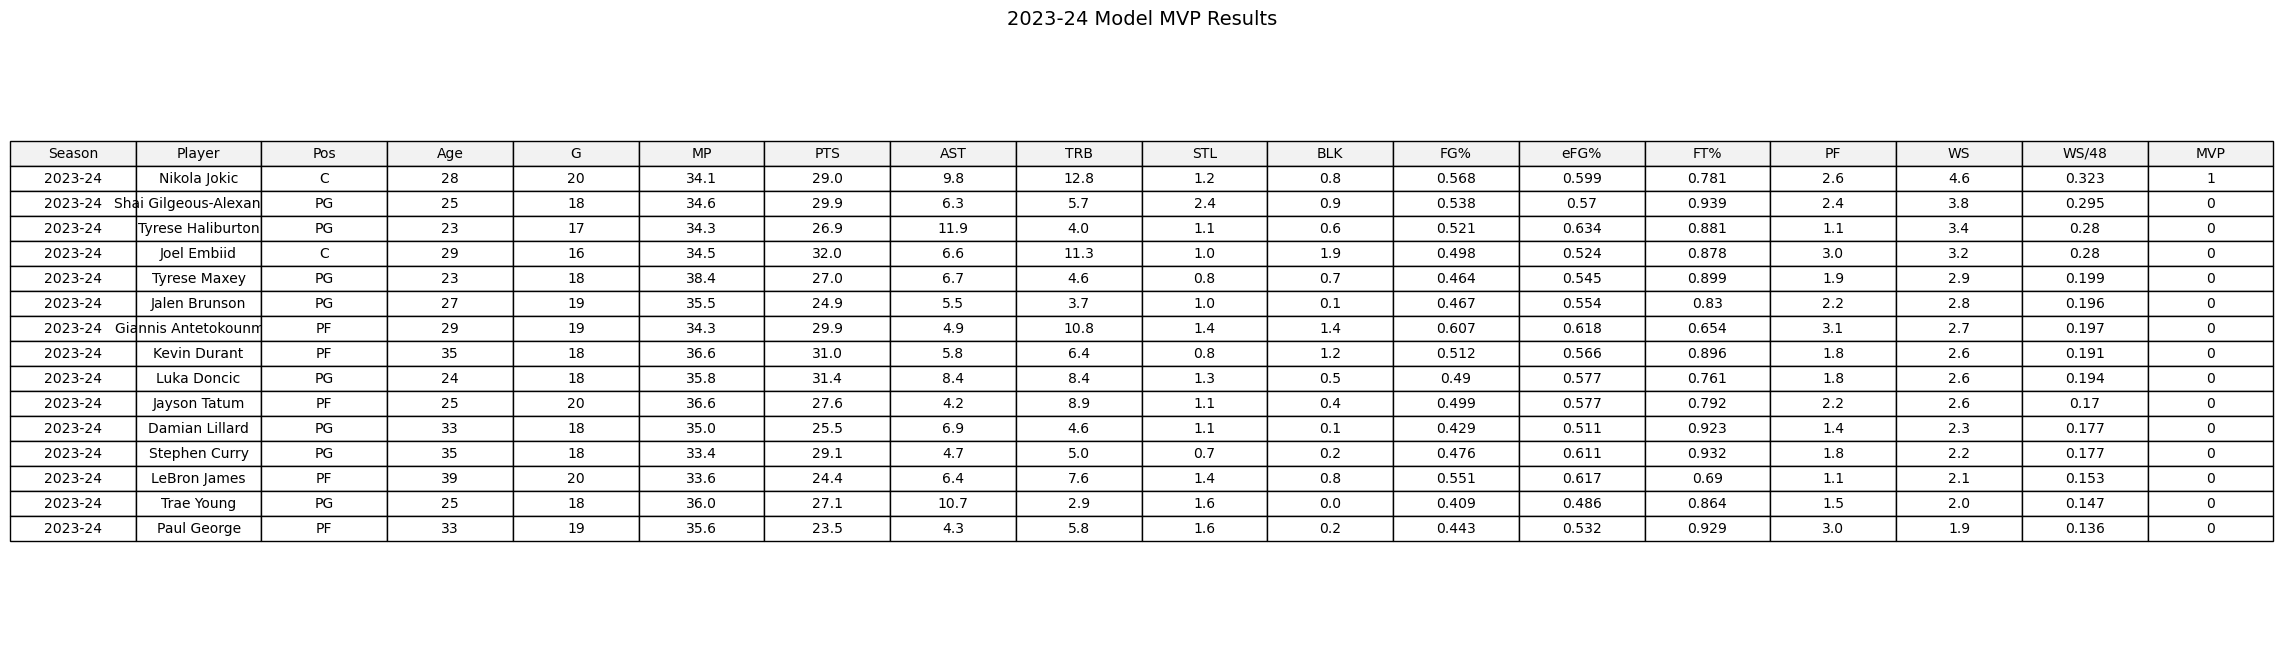

In [50]:
# Create a figure and hide axis
fig, ax = plt.subplots(figsize = (19.47,8))
ax.axis('off')

# Define the title you want to add to the table
table_title = "2023-24 Model MVP Results"

# Create a table from the DataFrame and add it to the axis
table = ax.table(cellText=nba_top_15.values, colLabels=nba_top_15.columns, loc='center', cellLoc='center', colColours=['#f2f2f2']*len(nba_top_15.columns))

# Add a title above the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)
plt.title(table_title, fontsize=14)

# Save the figure as an image (e.g., PNG)
plt.savefig('Test_Results/23-24_Model_Results.png', bbox_inches='tight', pad_inches=0.05)
plt.show()

## Display the 2022-23 Actual MVP race and who won MVP

In [42]:
nba_22_23_mvp = pd.read_csv("Datasets/mvps_stats_all_seasons_revised.csv")
nba_22_23_mvp

,Unnamed: 0,Season,Rank,Player,Pos,Age,G,MP,PTS,AST,...,eFG%,FT%,PF,WS,WS/48,First,Pts Won,Pts Max,Share,MVP
0,0,1996-97,1,Karl Malone,PF,33,82,36.6,27.4,4.5,...,0.550,0.755,2.6,16.7,0.268,63,986,1150,0.857,1
1,1,1996-97,2,Michael Jordan,SG,33,82,37.9,29.6,4.3,...,0.516,0.833,1.9,18.3,0.283,52,957,1150,0.832,0
2,2,1996-97,3,Grant Hill,SF,24,80,39.3,21.4,7.3,...,0.500,0.711,2.3,14.6,0.223,0,376,1150,0.327,0
3,3,1996-97,4,Tim Hardaway,PG,30,81,38.7,20.3,8.6,...,0.489,0.799,2.0,12.9,0.198,0,238,1150,0.207,0
4,4,1996-97,5,Glen Rice,SF,29,79,42.6,26.8,2.0,...,0.546,0.867,2.4,10.8,0.154,0,134,1150,0.117,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,393,2022-23,9,Stephen Curry,PG,34,56,34.7,29.4,6.3,...,0.614,0.915,2.1,7.8,0.192,0,5,1000,0.005,0
394,394,2022-23,10,Jimmy Butler,PF,33,64,33.4,22.9,5.3,...,0.560,0.850,1.3,12.3,0.277,0,3,1000,0.003,0
395,395,2022-23,11,De'Aaron Fox,PG,25,73,33.4,25.0,6.1,...,0.557,0.780,2.4,7.4,0.146,0,2,1000,0.002,0
396,396,2022-23,12T,Jalen Brunson,PG,26,68,35.0,24.0,6.2,...,0.547,0.829,2.2,8.7,0.175,0,1,1000,0.001,0


In [43]:
true_22_23_mvpResults = nba_22_23_mvp[nba_22_23_mvp['Season'] == '2022-23']
true_22_23_mvpResults.drop(columns = 'Unnamed: 0', inplace = True)

/var/folders/jq/v09bhc5d2111vbxp7qgxxq4m0000gn/T/ipykernel_68807/2314961576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_22_23_mvpResults.drop(columns = 'Unnamed: 0', inplace = True)


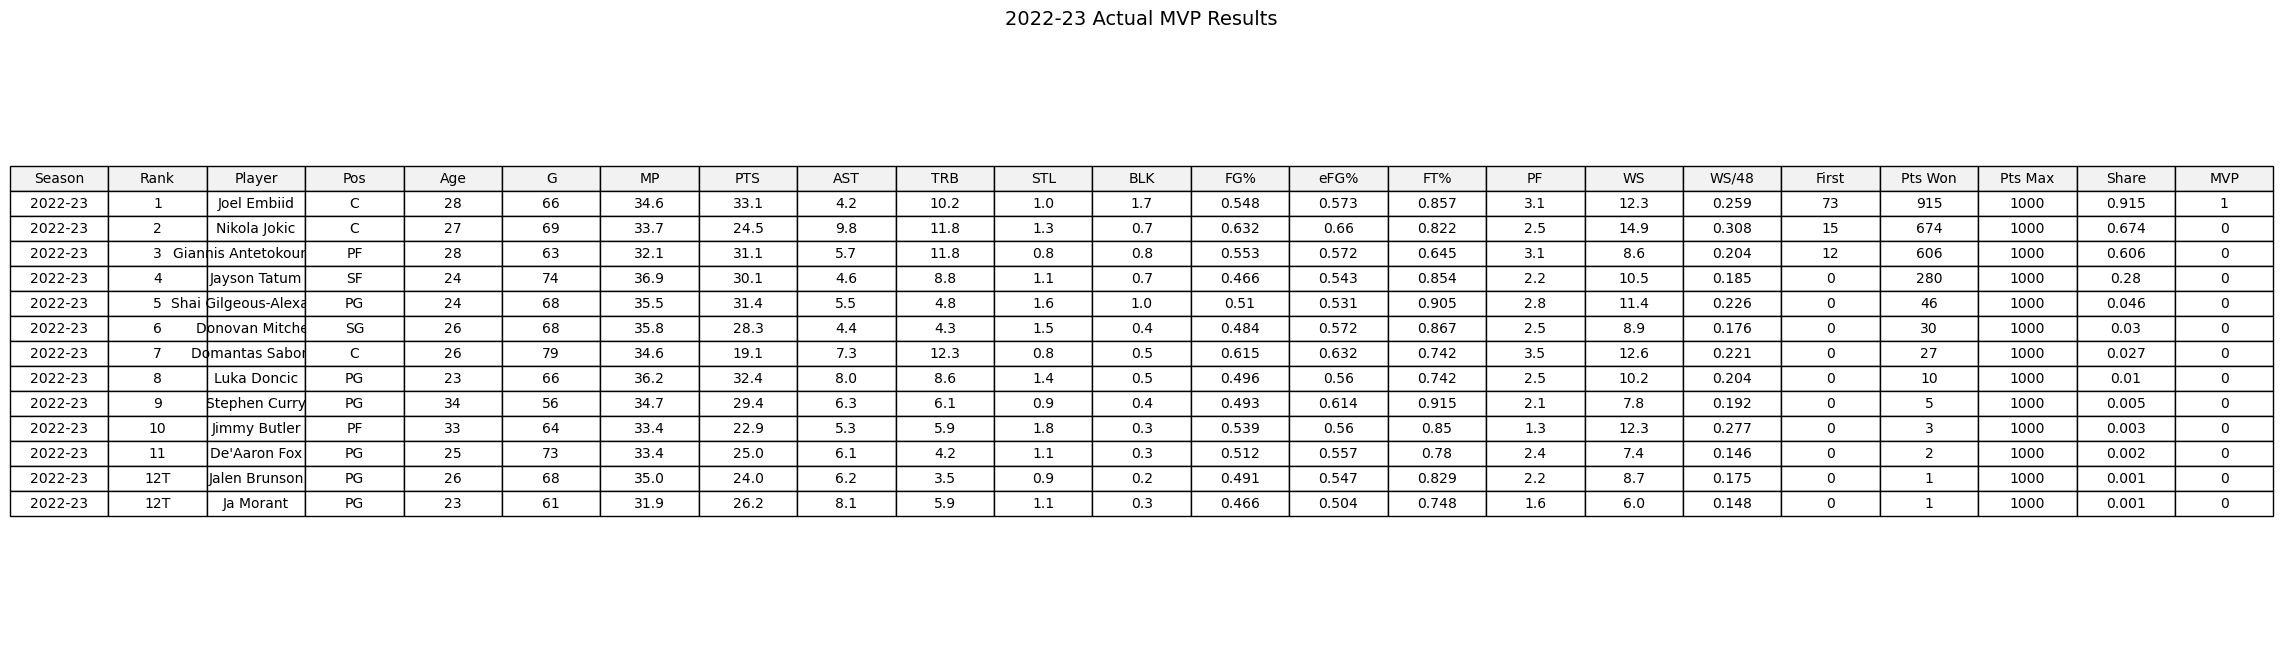

In [49]:
# Create a figure and hide axis
fig, ax = plt.subplots(figsize = (19.47,8))
ax.axis('off')

# Define the title you want to add to the table
table_title = "2022-23 Actual MVP Results"

# Create a table from the DataFrame and add it to the axis
table = ax.table(cellText=true_22_23_mvpResults.values, colLabels=true_22_23_mvpResults.columns, loc='center', cellLoc='center', colColours=['#f2f2f2']*len(true_22_23_mvpResults.columns))

# Add a title above the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)
plt.title(table_title, fontsize=14)

# Save the figure as an image (e.g., PNG)
plt.savefig('Test_Results/22-23_true_mvp_results.png', bbox_inches='tight', pad_inches=0.05)
plt.show()